# Topic Term Significance

```yaml
Course:    DS 5001 
Module:    08 Lab
Topic:     LDA Topic Significance
Author:    R.C. Alvarado
Date:      05 March 2024
```

**Purpose:** To explore term significance within topics as defined by various authors.

# Set Up

## Config

In [1]:
import configparser
config = configparser.ConfigParser()
config.read('../../../env.ini')
data_home = config['DEFAULT']['data_home']
output_dir = config['DEFAULT']['output_dir']
local_lib = config['DEFAULT']['local_lib']

## Imports

In [2]:
import pandas as pd
import numpy as np
import plotly_express as px

In [3]:
import sys; sys.path.append(local_lib)
from hac import HAC

In [4]:
data_prefix = 'austen-melville'
colors = "YlGnBu"
n_topics = 40
OHCO = ['book_id','chap_num']

# Get the Data

In [5]:
TOPICS = pd.read_csv(f"{output_dir}/{data_prefix}-LDA_TOPICS-{n_topics}.csv").set_index('topic_id')
PHI = pd.read_csv(f"{output_dir}/{data_prefix}-LDA_PHI-{n_topics}.csv").set_index('topic_id')

# Define Label Function

In [6]:
LABELS = pd.DataFrame({'default':None}, index=PHI.index)
def extract_label(phi, label, n_terms=7):
    LABELS[label] = LABELS.apply(lambda x: ', '.join(phi.loc[x.name].sort_values(ascending=False).head(n_terms).index), axis=1)

# Default

In [7]:
extract_label(PHI, 'default')

# Relevance

Sievert, Carson, and Kenneth Shirley. 2014. “LDAvis: A Method for Visualizing and Interpreting Topics.” In _Proceedings of the Workshop on Interactive Language Learning, Visualization, and Interfaces_, 63–70. https://aclanthology.org/W14-3110.pdf

![image-3.png](images/topic-relevance.png)

In [8]:
λ = .5
PW = PHI.sum() / PHI.sum().sum()
PHI_REL = λ * np.log(PHI) + (1 - λ) * np.log(PHI/PW)

In [9]:
extract_label(PHI_REL, 'rel')

# Saliency

Chuang, Jason, Christopher D. Manning, and Jeffrey Heer. 2012. “Termite: Visualization Techniques for Assessing Textual Topic Models.” In _Proceedings of the International Working Conference on Advanced Visual Interfaces_, 74–77. AVI ’12. New York, NY, USA: Association for Computing Machinery. https://doi.org/10.1145/2254556.2254572.

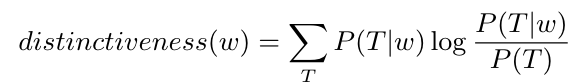

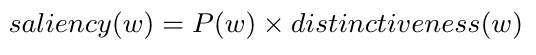


In [10]:
PTw = (PHI / PHI.sum()).T
PT = (PHI.T.sum() / PHI.T.sum().sum())
PHI_DST = PTw * np.log(PTw/PT)
PHI_SAL = PHI_DST.T * PW

In [11]:
extract_label(PHI_SAL, 'sal')

# TFIDF

We treat topics as documents.

In [12]:
TF = (PHI.T / PHI.T.sum()).T
DF = PHI.sum() / PHI.sum().sum()
PHI_TFIDF = TF * -np.log2(DF)

In [13]:
extract_label(PHI_TFIDF, 'tfidf')

# Compare

In [14]:
LABELS.loc['T38'].values

array(['time, day, house, thing, room, sister, man',
       'pleasure, sister, house, party, family, room, home',
       'pleasure, sister, house, family, party, room, home',
       'time, house, day, sister, room, pleasure, thing'], dtype=object)

In [15]:
LABELS.loc['T20'].values

array(['time, feelings, heart, mind, moment, letter, happiness',
       'feelings, happiness, letter, affection, engagement, heart, mind',
       'feelings, happiness, letter, heart, affection, mind, moment',
       'time, feelings, heart, mind, letter, moment, happiness'],
      dtype=object)

In [16]:
LABELS.loc['T32'].values

array(['law, man, court, punishment, laws, code, time',
       'code, punishment, court, laws, flogging, law, lash',
       'law, court, punishment, laws, code, flogging, cases',
       'law, court, punishment, laws, man, code, flogging'], dtype=object)

In [17]:
LABELS.sample().values

array([['valley, natives, time, island, house, place, islanders',
        'valley, natives, islanders, island, fruit, tappa, savages',
        'valley, natives, island, islanders, fruit, savages, tappa',
        'valley, natives, island, islanders, fruit, house, time']],
      dtype=object)

In [18]:
LABELS

,default,rel,sal,tfidf
topic_id,,,,
T00,"passengers, emigrants, steerage, cabin, mess, ...","passengers, emigrants, steerage, organ, steera...","passengers, emigrants, steerage, mess, cook, c...","passengers, emigrants, steerage, mess, cook, c..."
T01,"lord, man, men, things, wine, ha, day","lord, ha, wine, yoomy, philosopher, puff, mortals","lord, ha, wine, philosopher, yoomy, ah, mortals","lord, man, wine, ha, men, things, ah"
T02,"sea, air, fish, round, day, trees, groves","yillah, glen, fish, lagoon, arbor, flowers, ma...","fish, air, yillah, sea, groves, flowers, glen","sea, fish, air, yillah, round, groves, flowers"
T03,"man, way, friend, nature, sort, stranger, conf...","cosmopolitan, man, stranger, confidence, natur...","man, cosmopolitan, nature, stranger, confidenc...","man, friend, nature, way, stranger, confidence..."
T04,"sir, herb, confidence, man, herb doctor, ugh, ...","sir, herb, herb doctor, ugh, medicine, sir sir...","sir, herb, herb doctor, ugh, confidence, docto...","sir, herb, herb doctor, ugh, confidence, docto..."
T05,"father, mother, family, years, brother, time, ...","father, mother, aunt, marriage, child, daughte...","father, mother, aunt, child, marriage, family,...","father, mother, family, aunt, child, years, ma..."
T06,"landlord, abbey, gallery, generals, harpooneer...","abbey, landlord, generals, gallery, tomahawk, ...","abbey, landlord, generals, gallery, harpooneer...","landlord, abbey, gallery, generals, harpooneer..."
T07,"doctor, day, country, village, horse, morning,...","doctor, cocoa, village, cocoa nut, nut, road, ...","doctor, village, road, horse, country, cocoa, nut","doctor, village, country, horse, road, day, cocoa"
T08,"room, door, house, moment, time, bed, night","room, door, bed, coach, inn, window, street","room, door, bed, house, moment, street, window","room, door, house, moment, bed, night, time"
